# Course Evaluation: Please fill out [this quick eval!](https://forms.office.com/Pages/ResponsePage.aspx?id=lYdfxj26UUOKBwhl5djwkFtIujJ9lCFMouysTWFV3rRURFZHRjFZUVc2QTlJNzJDMUdUWjhXN1dPMi4u)

# Geospatial Plotting with Matplotlib and Cartopy
---
Notebook by Alice Hsu (Feb 2026), with adapted examples from prior UEA Python PPDs

Concepts covered:
* Review of Figure, Axes, and Subplots
* Review of contours
    * Gridded data and `meshgrid()`
* Cartopy and maps
---

In [1]:
import matplotlib.pyplot as plt    # most of the time, pyplot is the only matplotlib submodule we need.
import numpy as np
import pandas as pd

from IPython.display import Image, display
# we'll need numpy to create and read some data to plot.

To be efficient with matplotlib, you first need to understand its **terminology**:

# A quick recap of Matplotlib basics...

## Figure, Axes or Axis? 
* The **figure** is the **whole image**, the top-level 'container' that holds all the pieces ("objects") of your figure.
* The **axes** is the part of a **figure** where you actually plot your data and control how your data is displayed. For example, you use the axes to:
    * Set the **data limits**
    * Set **tick marks** and their **labels**
    * Set **axes labels**
    * Set **subplot titles**
    * Customize your plot, e.g., **colors/colormaps, line widths, marker shapes, etc**.
* A **figure** can have multiple **axes** - for example, two subplots on a single figure.
<img src="https://matplotlib.org/3.3.3/_images/anatomy.png" style="height:40%; width:50%;">

There are several ways to **create the a plot** with Matplotlib.

Generally, the most flexible option is `fig, ax = plt.subplots()`:

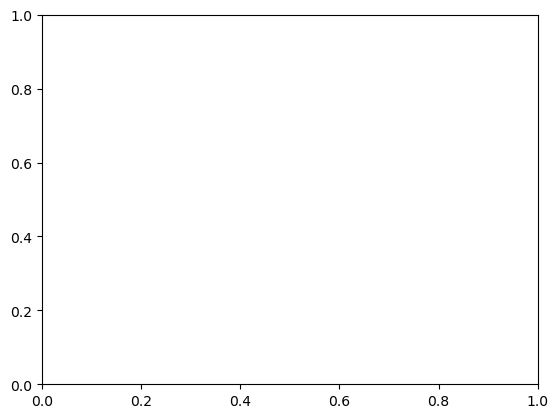

In [33]:
fig, ax = plt.subplots()

However, with Cartopy, the map plotting package we will be using, we may also use the other methods:

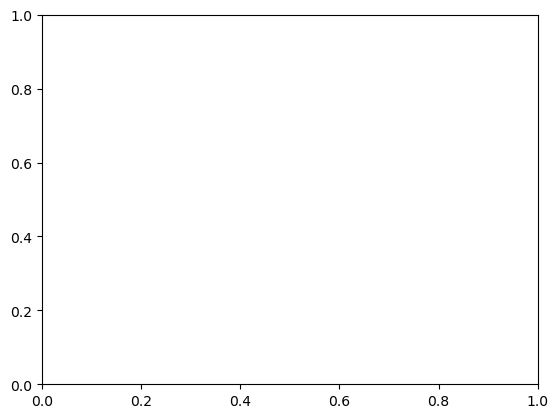

In [32]:
axes = plt.subplot()

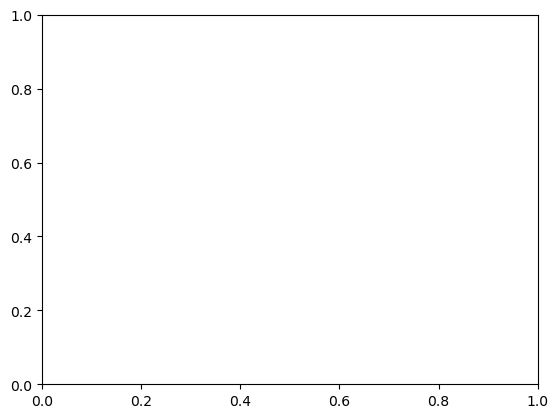

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

## Multiple Subplots

Note that you can **create multiple subplots** by simply specifying numbers in the parentheses of `plt.subplots()`.
   * `plt.subplots(num_rows,num_columns)`

You can also change the **figure size** to accommodate the number of subplots using the `figsize` argument.
* `plt.subplots(figsize=(row_width,column_height))`

Note that to **access or customize a specific axes** within the grid of subplots, you have to **specify an index** for the **row** and the **column**.

All together, this looks like:

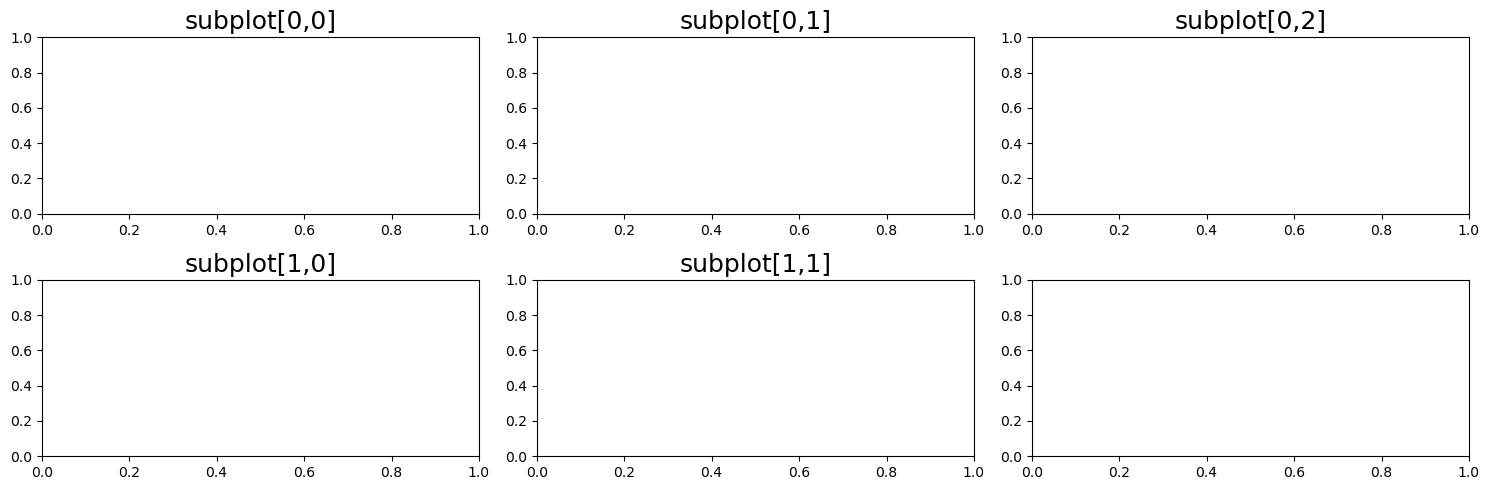

In [3]:
fig, axs = plt.subplots(2,3,figsize=(15,5))

axs[0,0].set_title('subplot[0,0]', fontsize=18);
axs[0,1].set_title('subplot[0,1]', fontsize=18);
axs[0,2].set_title('subplot[0,2]', fontsize=18);
axs[1,0].set_title('subplot[1,0]', fontsize=18);
axs[1,1].set_title('subplot[1,1]', fontsize=18);
axs[1,2].set_title('subplot[1,2]', fontsize=18);

plt.tight_layout()

The `plt.tight_layout()` line just tells Matplotlib to tidy up the layout so that the plots don't overlap with the plot titles.

# Recap of Plotting in 3D

Sometimes, you may need to plot data with **multiple dimensions**.

This is especially true if you have **gridded data**, e.g., a **value corresponding to a specific location** (e.g., a concentration at a coordinate (x,y)), or if you are working with **geospatial data** and **making maps**.

A few **Matplotlib functions** that all work similarly for plotting gridded data are:

* **`contour()`** and **`contourf()`**: draw contour lines and filled contours, respectively
* **`pcolor()`** and **`pcolormesh()`**: draw heatmaps

For simplicity, we will just focus on **`contourf()`**, since it takes a similar data input format as the other functions.

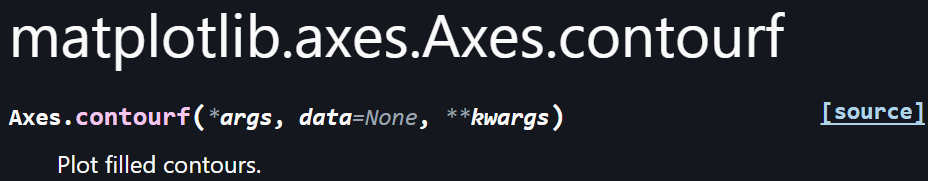

In [20]:
display(Image(filename='GSAP1/figures/contourf_doc1.png',width=400))

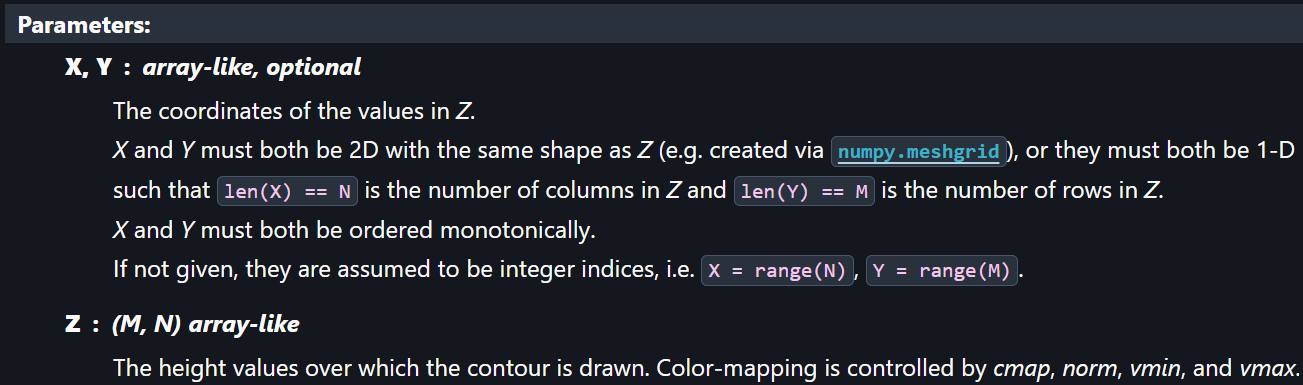

In [23]:
display(Image(filename='GSAP1/figures/contourf_doc2.png',width=600))

Generally, you will use `contourf()` as such:
* `contourf(X,Y,Z)`

Note that **Z** must be a **2D array** - i.e., it must have **M rows** and **N columns**, where M and N are the lengths of X and Y, respectively.

Let's try it out on some **made up data** on some arbitrary **bivariate function, f(x,y)**. Below we've just created a function equivalent to the equation: <center>$f(x,y) = (1-\frac{x}{2}+x^5+y^3)*e^{-x^2+y^2}$

In [123]:
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

Now let's create our **Z array** using this function by **plugging in some x and y values**. First, we will **create some values for x and y**.

In [2]:
x = np.linspace(-3,3,61)
y = np.linspace(-2,2,41)
print(x)
print(y)

[-3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7
 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3
 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1
  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
  2.6  2.7  2.8  2.9  3. ]
[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]


In this case, **x** is made up of values **between -3 and 3**, in **increments of 0.1**, while **y** is made of values between **-2 and 2** in **increments of 0.1**.

Now let's **plug x and y** into our function, f(x,y). Recall that we must use the **`np.meshgrid()` function** to calculate and plot our 3D data.

In [5]:
meshx,meshy = np.meshgrid(x,y)

Z = f(meshx,meshy)

In [129]:
Z.shape

(41, 61)

Remember we **mesh** our data because **`Z` is a 41x61 array of data**, with 2501 total data points that were calculated using all **2501 (i.e., 41 x 61) possible combinations** of the values in `x` and `y`. As such, **every point within `Z` has a corresponding coordinate pair, (x,y)**.

For example, the **first value in Z** corresponds to the value of **f(-3,-2)**, or when **<span style="color:blue">x = -3</span> and <span style="color:red">y = -2</span>**.

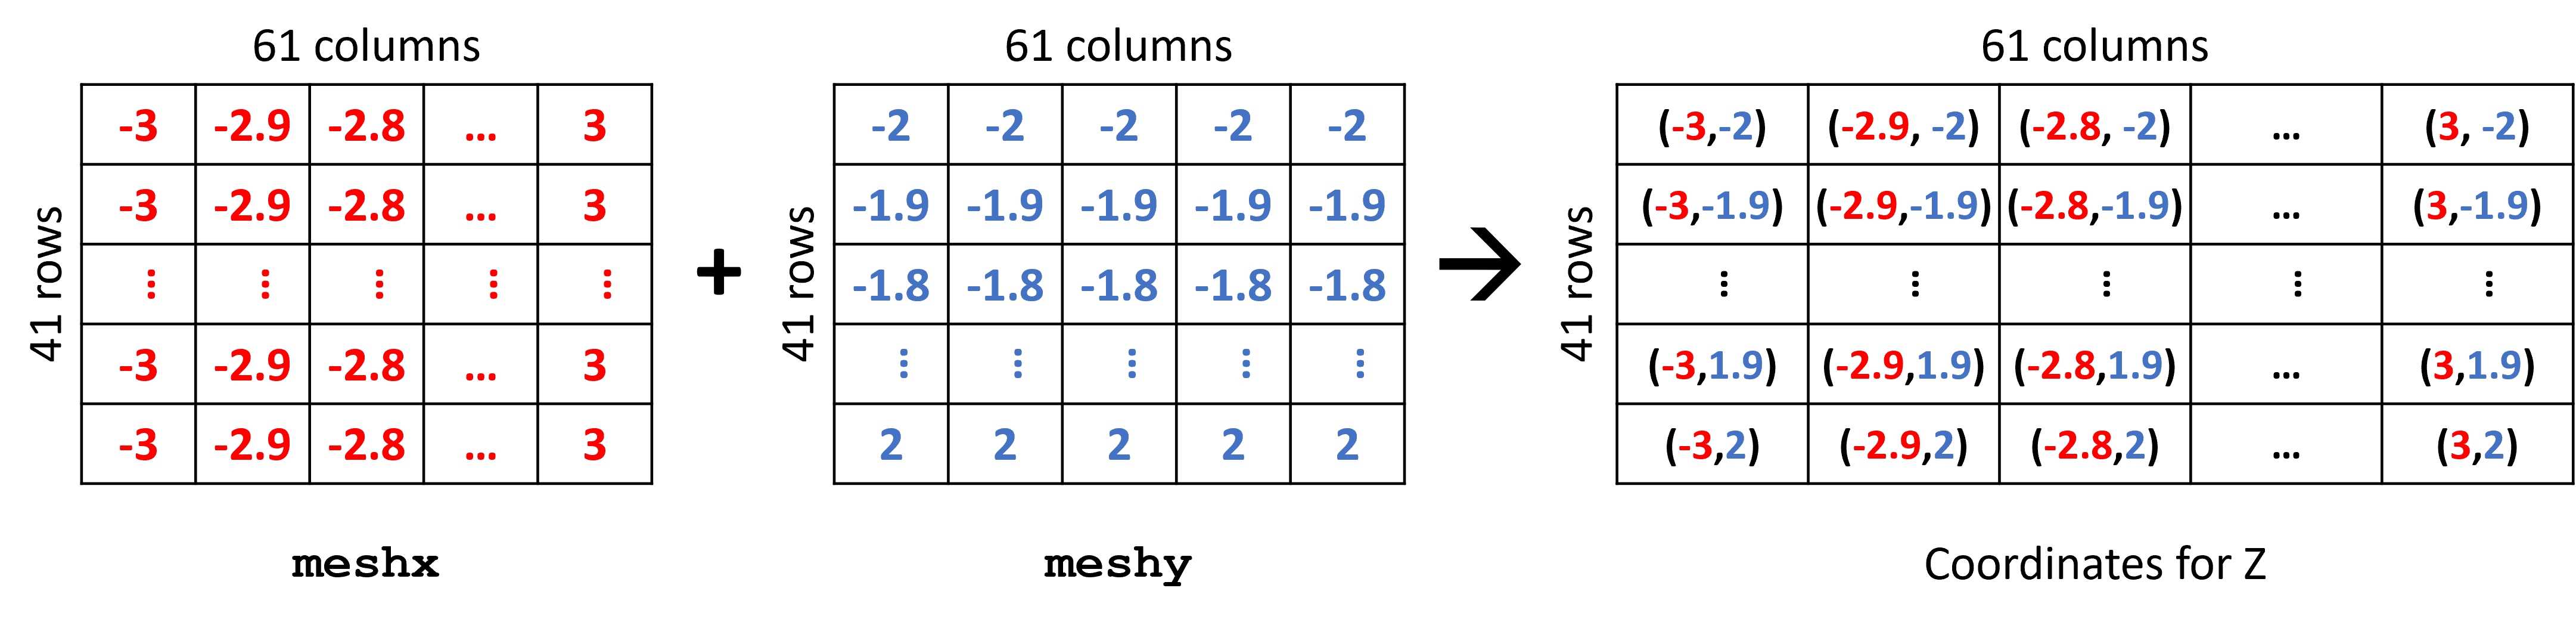

In [17]:
display(Image(filename='GSAP1/figures/meshgrid_explanation.png',width=900))

In [6]:
print('meshx:'+str(meshx.shape))
print(meshx)

print('meshy:'+str(meshx.shape))
print(meshy)

meshx:(41, 61)
[[-3.  -2.9 -2.8 ...  2.8  2.9  3. ]
 [-3.  -2.9 -2.8 ...  2.8  2.9  3. ]
 [-3.  -2.9 -2.8 ...  2.8  2.9  3. ]
 ...
 [-3.  -2.9 -2.8 ...  2.8  2.9  3. ]
 [-3.  -2.9 -2.8 ...  2.8  2.9  3. ]
 [-3.  -2.9 -2.8 ...  2.8  2.9  3. ]]
meshy:(41, 61)
[[-2.  -2.  -2.  ... -2.  -2.  -2. ]
 [-1.9 -1.9 -1.9 ... -1.9 -1.9 -1.9]
 [-1.8 -1.8 -1.8 ... -1.8 -1.8 -1.8]
 ...
 [ 1.8  1.8  1.8 ...  1.8  1.8  1.8]
 [ 1.9  1.9  1.9 ...  1.9  1.9  1.9]
 [ 2.   2.   2.  ...  2.   2.   2. ]]


And now we plot our contour:

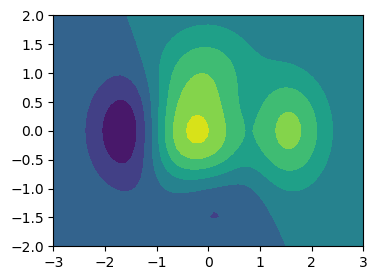

In [130]:
fig, ax = plt.subplots(figsize=(4,3))
ax.contourf(meshx,meshy,Z);

### Colorbars

When plotting contours, we will often need a **colorbar**.

A **colorbar** has its own **`axes`**.

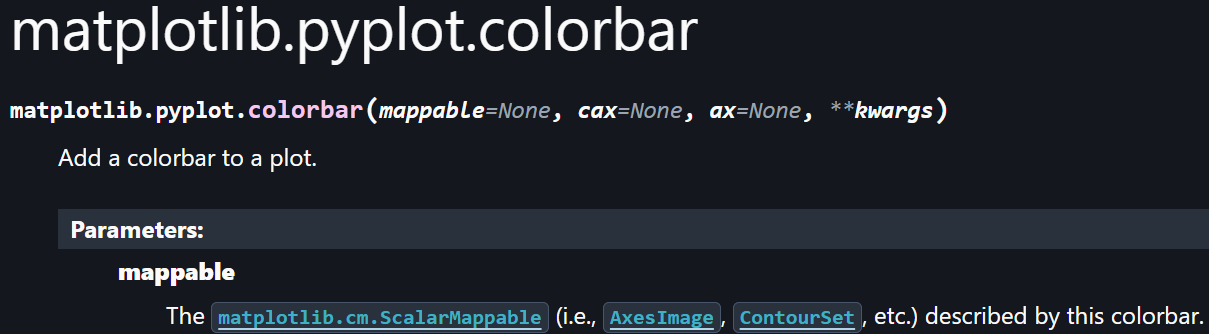

In [27]:
display(Image(filename='GSAP1/figures/colorbar_doc.png',width=600))

<u>To add a colorbar to a figure:</u>
1. You must first **create a handle** for the plot on the axes, or make it "mappable"; for example, if you plotted our data `Z` on a filled contour using `contourf()` on an axes called `ax`:

    * <code>handle = ax.contourf(Z)</center></code>
2. Then, you **tell your figure `fig` that you want to add a colorbar to it** by calling the `colorbar()` method on it. Here, you also specify the axes' handle:

    * <code>fig.colorbar(handle)</center></code>
    * Specifying the axes' handle **tells the colorbar what data the colorbar should follow**.

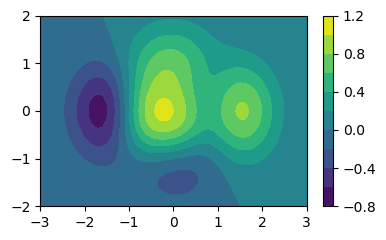

In [51]:
fig, ax = plt.subplots(figsize=(4,2.5))
handle = ax.contourf(meshx, meshy, Z, 10)
fig.colorbar(handle)

plt.tight_layout()

## Plotting Maps

**Cartopy** is a Python package used to create maps. It supports **different map projections and administrative boundaries** and is **well integrated with Matplotlib**, so it is easy to use Matplotlib's plotting functions on top of it.

**Cartopy** must be imported separately from Matplotlib:

In [3]:
try:
    import cartopy
except:
    !pip install cartopy
    import cartopy

In order to add a **map outline** to a plot, you must first **pick a map projection**. This is done by setting the <u>**C**</u>oordinate <u>**R**</u>eference <u>**S**</u>ystem, or `crs`, in Cartopy.

Cartopy has over a dozen projections you can choose from ([documentation here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)), including:
<img src="https://primer-computational-mathematics.github.io/book/_images/Cartography_Cartopy_3_0.png" style="height:20%; width:50%;">

To set your `crs` to the **projection** you want, the syntax would be:

In [138]:
my_crs = cartopy.crs.PlateCarree()

Now let's actually **add some mapping data of this projection to our figure axes**.

Note that when you set a projection to a Matplotlib axes, it automatically becomes a **GeoAxes** ([documentation here](https://scitools.org.uk/cartopy/docs/v0.22/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html)).

**GeoAxes** are similar to the normal Matplotlib axes we know, except they are specially formatted for maps. For example, they have a handy function that automatically **draws coastlines**:

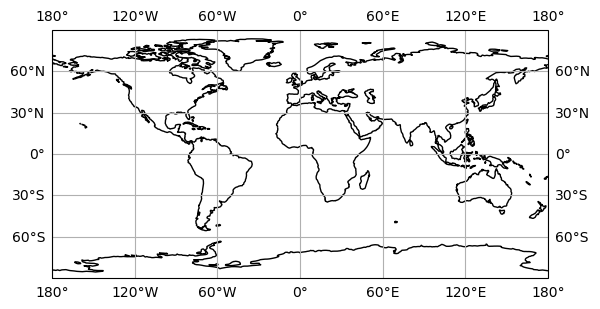

In [139]:
# Creates an axes and sets the projection of the axes
ax = plt.axes(projection=my_crs)

# Add coastlines to the axes
ax.coastlines()

# Add x and y axes labels
ax.gridlines(draw_labels=True)

On a GeoAxes, we can even add other [useful geographical features that are built-in](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html) to the Cartopy package:

| Name    | Description |
| :-------- | :------- |
| `cartopy.feature.BORDERS`  | Country boundaries.|
| `cartopy.feature.COASTLINE` | Coastline, including major islands.|
| `cartopy.feature.LAKES`    | Natural and artificial lakes.|
| `cartopy.feature.LAND`    | Land polygons, including major islands.|
| `cartopy.feature.OCEAN`    | Ocean polygons.|
| `cartopy.feature.RIVERS`   | Single-line drainages, including lake centerlines.|
|`cartopy.feature.STATES`|Automatically scaled state and province boundaries.|

For example, the syntax to **add the country boundaries feature** would be:

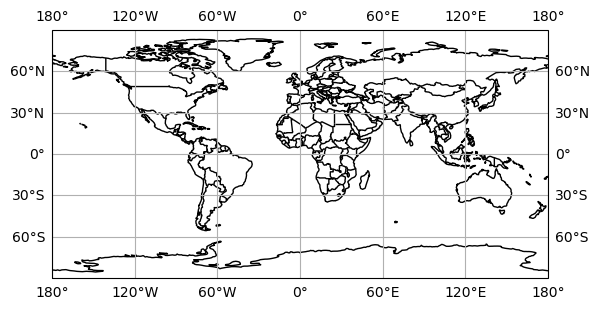

In [144]:
my_crs = cartopy.crs.PlateCarree()

ax = plt.axes(projection=my_crs)
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add country borders to the axes
ax.add_feature(cartopy.feature.BORDERS)

Similar to our Matplotlib axes, we can still **add and format our classic Matplotlib plots** on top of the maps!

Below, to my GeoAxes, we can **add a scatterplot of longitudes and latitudes to the map** we created before.

Note that you must **ensure the data you add to your map is transformed to the correct projection**.

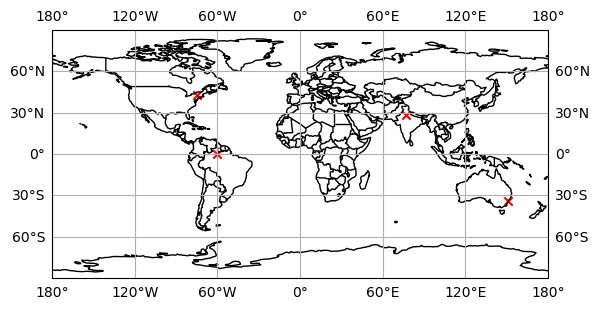

In [147]:
my_crs = cartopy.crs.PlateCarree()
ax = plt.axes(projection=my_crs)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.gridlines(draw_labels=True)

# Add scatter plot
lons = [-75, 77.2, 151.2, -60]
lats = [43, 28.6, -33.9, 0]
ax.scatter(lons, lats, marker='x',color='r')
ax.set_global()

## <span style="color:blue">Demo: Plotting a Flight Path </span>

In this exercise, we will **make a map of the flight path** of some research aircraft. Suppose the research flight took place over the United States, with the following stops:

**(-121$^{\circ}$,39$^{\circ}$), (-112$^{\circ}$,47$^{\circ}$), (-100$^{\circ}$,32$^{\circ}$), (-94$^{\circ}$,38$^{\circ}$), (-79$^{\circ}$,38$^{\circ}$), (-70$^{\circ}$,45$^{\circ}$)**

These coordinates are saved in `flight_lon` and `flight_lat` below.

1. **Create a GeoAxes** and set it to the **Plate Carree projection**.
2. **Add gridlines** to the GeoAxes.
3. **Add coastlines** to the GeoAxes.
4. **Add the states borders** feature to the GeoAxes.
5. **Add the plot of the flight stops** to the GeoAxes. You will need `flight_lon` and `flight_lat`, created in steps 1-2.
6. **Set the x- and y- limits** to contain the boundaries of the US.
    * For x-limits, this is roughly -125 to -65.
    * For y-limits, this is roughly 25 to 50.
7. Set your line plot to have an **'o' as the marker**, and the **line color to be red**.

**Note: copy code from the cells above as needed.**

(25.0, 50.0)

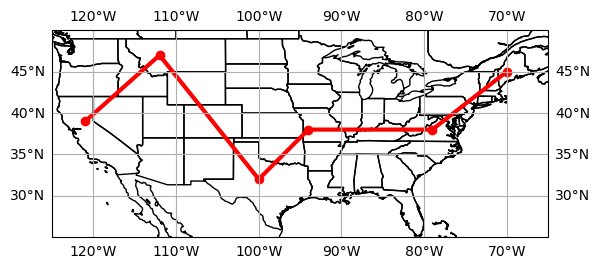

In [151]:
flight_lon = [-121,-112,-100,-94,-79,-70]
flight_lat = [39,47,32,38,38,45]




### A quick aside on map projections...

Note that data must often be transformed into units corresponding to the map projection. You can find more information on how to do that in Cartopy [here](https://scitools.org.uk/cartopy/docs/v0.16/tutorials/understanding_transform.html).

For example, say you wanted to **plot the above flight data in a Robinson projection**. However, the Robinson projection doesn't take latitude/longitude as inputs. Thus, **the flight data has to be transformed to the correct projection.**

Since the flight data plotted as expected on the Plate Carree projection, we can assume the data is in that projection (hence `data_crs = cartopy.crs.PlateCarree()`).

To transform the flight data, you just have to specify what `crs` the flight data is in with the `transform = data_crs` keyword argument in the `plot()` function.

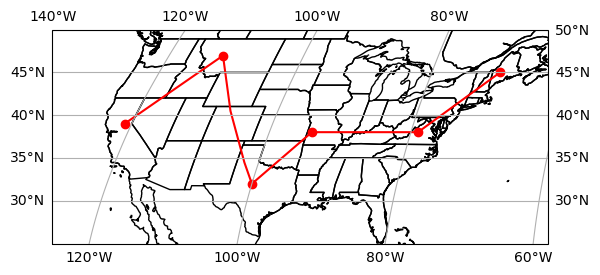

In [154]:
# Flight data
flight_lon = [-121,-112,-100,-94,-79,-70]
flight_lat = [39,47,32,38,38,45]

# CRS you want your map in
my_crs = cartopy.crs.Robinson()

# CRS the data is in
data_crs = cartopy.crs.PlateCarree()

# Create GeoAxes with preferred CRS
ax = plt.axes(projection=my_crs)

# Add coastlines, features, gridlines
ax.coastlines()
ax.add_feature(cartopy.feature.STATES)
ax.gridlines(draw_labels=True)

# Plot the data AND specify what projection the data is in
# This tells Cartopy what projection it needs to transform the data from
ax.plot(flight_lon,flight_lat,marker='o',color='red',transform=data_crs)
ax.set_extent([-125,-65,25,50],crs=data_crs)

# Practical: Plotting Sea Surface Temperature (SST) on a Map

In this exercise, we will put together concepts on:
* Cartopy
* Plotting in 3D
    * Plotting gridded data
* `meshgrid()`

We will be using real sea surface temperature data from NASA JPL.

In this dataset, we have a **180x361 dataset of SST**, in K, on 16-JUN-2002. There a SST value for every one degree of longitude and latitude.

Source: https://podaac-tools.jpl.nasa.gov/las/UI.vm

Run the cell below to read in the data and format it correctly for plotting.

In [158]:
# Read modelling sst data
lon_raw, lat_raw, sst_raw = np.genfromtxt('data/AMSR-E_Level_3_Sea_Surface_Temperature_for_Climate_Model_Comparison.csv', delimiter=',', 
                              skip_header=10,usecols=(2, 3, 4), unpack=True)
# Reshape into a grid of sst with corresponding lat and lon coordinates
lon = np.unique(lon_raw)
lat = np.unique(lat_raw)
sst = np.reshape(sst_raw,(len(lat),len(lon)));
# Replace missing values with nans
sst[sst<0] = np.nan

In this exercise, you will create **one subplot** that has a world map of the coastlines along with the SST plotted on it. Your final figure should look like this:

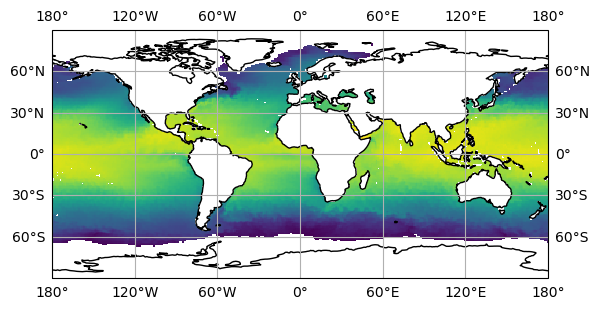

In [15]:
display(Image(filename='GSAP1/figures/plotting_challenge_2.png',width=500))

These steps should help you get started:
1. **Create a GeoAxes** and set it to the **Plate Carree projection**.
2. **Add gridlines** to the GeoAxes.
3. **Add coastlines** to the GeoAxes.
4. **Prepare the longitude (`lon`) and latitude (`lat`) for plotting** using the `np.meshgrid()` function.
    * You should create a `mesh_lon` and `mesh_lat` similar to te `meshx` and `meshy` we created in the `contourf()` section.
7. **Use the `pcolor()` function to plot the SST** to the GeoAxes. You will need `mesh_lon` and `mesh_lat`, created in steps.
7. **Set the x- and y- limits** to -180 to 180 and -90 to 90, respectively.

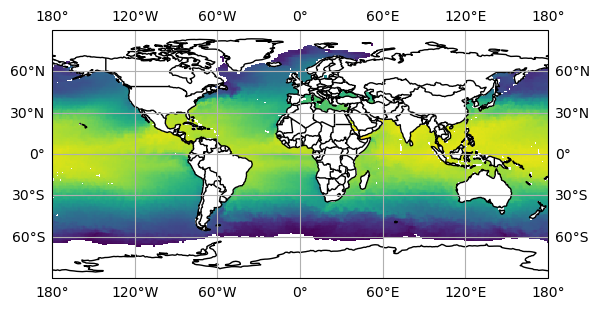

In [162]:
#### YOUR CODE HERE ####




# Default sequantial and diverging colormaps

More info: [colormaps reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_001_2_00x.png" style="height:25%; width:50%;">
<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_002_2_00x.png" style="height:70%; width:50%;">

### Don't let bad colormaps mess with your science!
Also referred to as rainbow, jet is a problematic colormap that promotes bad science. To explore the reasons why, and to see examples of how jet hides craters on Mars and distorts photographs, go read [this blog post](https://titan.uio.no/english/2021/improper-use-colours-can-distort-scientific-data) or [this Nature Communications paper](https://www.nature.com/articles/s41467-020-19160-7). 

Python has great preceptually uniform default colormaps. If they're not quite what you want, check out more good colourmaps crafted for [oceanography](https://matplotlib.org/cmocean/) and [general science + geophysics](http://www.fabiocrameri.ch/colourmaps.php).
A good colormap is perceptually uniform, intuitively suits the data being plotted and is color deficient vision-friendly. 

#  Saving figures

Use `fig.savefig(fname, dpi=, facecolor=, bbox_inches='tight', **kwargs)`. 

Matplotlib supports a range of vector (e.g. pdf) and raster (e.g. png) formats. The resolution of raster images can be set with the dpi (dots per inch) argument. 
(Sometimes, vector quality is desirable for only some elements of a figure, while other parts can be rasterized to reduce the figure file size. In that case, [```Axes.set_rasterization_zorder```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_rasterization_zorder.html) and the zorder plotting argument can be used to decide which figure elements should be rasterized.)

In [40]:
display(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

In [41]:
# Save our figure above
fig.savefig(base_dir/'figures/MY_AWESOME_COMBINED_FIGURE.png', 
            # facecolor='white',
            transparent=True,
            bbox_inches='tight')
plt.show()

## References: 
* https://matplotlib.org/faq/usage_faq.html
* http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html
* NAO image: UCAR, https://www.windows2universe.org/?page=/earth/climate/images/nao_lg_gif_image.html 

![](../figures/meme_mpl.png)

([by @sanjanacurtis on twitter](https://twitter.com/sanjanacurtis/status/1362495499689951236/photo/1))

# Course Evaluation: Please fill out [this quick eval!](https://forms.office.com/Pages/ResponsePage.aspx?id=lYdfxj26UUOKBwhl5djwkFtIujJ9lCFMouysTWFV3rRURFZHRjFZUVc2QTlJNzJDMUdUWjhXN1dPMi4u)